<ipython-input-4-45c2ac5baf0b>:55: RuntimeWarning: invalid value encountered in sqrt
  sobel_combined = np.sqrt(sobel_x_image*2 + sobel_y_image*2)


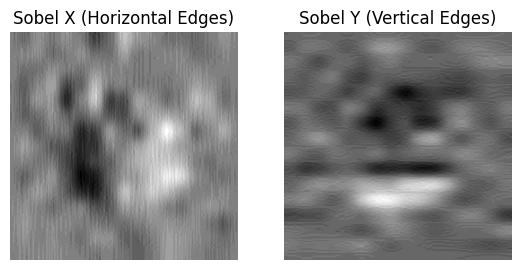

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Function to perform convolution
def convolve(image, kernel):
    image_x, image_y = image.shape  # dimensions (height and width) of the image
    kernel_x, kernel_y = kernel.shape  # dimensions of the kernel

    # Determining the output dimensions
    stride = 1  # step size by which we move the kernel across the image
    padding = 0  # no padding for simplicity

    output_x = int(((image_x - kernel_x + 2 * padding) / stride) + 1)  # dimensions of the output image
    output_y = int(((image_y - kernel_y + 2 * padding) / stride) + 1)

    # Initialize the output feature map
    output = np.zeros((output_x, output_y))  # matrix initialized to zeros to store the convolution result

    # Perform convolution
    for i in range(output_x):
        for j in range(output_y):
            region = image[i:i + kernel_x, j:j + kernel_y]  # extract the region of the image
            output[i, j] = np.sum(region * kernel)  # element-wise multiplication and sum

    return output

# Sobel x operator for horizontal edges
sobel_x = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

# Sobel y operator for vertical edges
sobel_y = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])
image_path = r'/content/drive/MyDrive/clasification-roi/test/Benign/BreaDM-Be-1810/SUB1/p-030.jpg'
image = Image.open(image_path).convert('L')  # Convert to grayscale
resized_image = image.resize((256, 256))  # Resize the image

# changing to numpy array
image = np.array(resized_image)

# x operator
sobel_x_image = convolve(image, sobel_x)

# y operator
sobel_y_image = convolve(image, sobel_y)

# magnitude of gradients
sobel_combined = np.sqrt(sobel_x_image*2 + sobel_y_image*2)

# Plot the results
plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
plt.imshow(sobel_x_image, cmap='gray')
plt.title('Sobel X (Horizontal Edges)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_y_image, cmap='gray')
plt.title('Sobel Y (Vertical Edges)')
plt.axis('off')
plt.show()

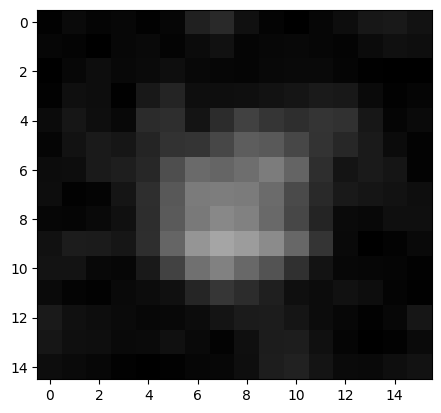

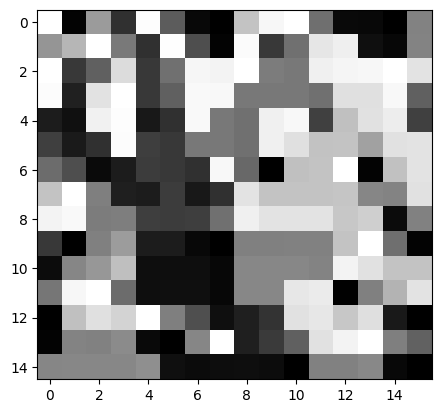

LBP Program is finished


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def get_pixel(img, center, x, y):

	new_value = 0

	try:
		# If local neighbourhood pixel
		# value is greater than or equal
		# to center pixel values then
		# set it to 1
		if img[x][y] >= center:
			new_value = 1

	except:
		# Exception is required when
		# neighbourhood value of a center
		# pixel value is null i.e. values
		# present at boundaries.
		pass

	return new_value

# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):

	center = img[x][y]

	val_ar = []

	# top_left
	val_ar.append(get_pixel(img, center, x-1, y-1))

	# top
	val_ar.append(get_pixel(img, center, x-1, y))

	# top_right
	val_ar.append(get_pixel(img, center, x-1, y + 1))

	# right
	val_ar.append(get_pixel(img, center, x, y + 1))

	# bottom_right
	val_ar.append(get_pixel(img, center, x + 1, y + 1))

	# bottom
	val_ar.append(get_pixel(img, center, x + 1, y))

	# bottom_left
	val_ar.append(get_pixel(img, center, x + 1, y-1))

	# left
	val_ar.append(get_pixel(img, center, x, y-1))

	# Now, we need to convert binary
	# values to decimal
	power_val = [1, 2, 4, 8, 16, 32, 64, 128]

	val = 0

	for i in range(len(val_ar)):
		val += val_ar[i] * power_val[i]

	return val

path = '/content/drive/MyDrive/clasification-roi/test/Benign/BreaDM-Be-1810/SUB1/p-030.jpg'
img_bgr = cv2.imread(path, 1)

height, width, _ = img_bgr.shape

# We need to convert RGB image
# into gray one because gray
# image has one channel only.
img_gray = cv2.cvtColor(img_bgr,
						cv2.COLOR_BGR2GRAY)

# Create a numpy array as
# the same height and width
# of RGB image
img_lbp = np.zeros((height, width),
				np.uint8)

for i in range(0, height):
	for j in range(0, width):
		img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

plt.imshow(img_bgr)
plt.show()

plt.imshow(img_lbp, cmap ="gray")
plt.show()

print("LBP Program is finished")


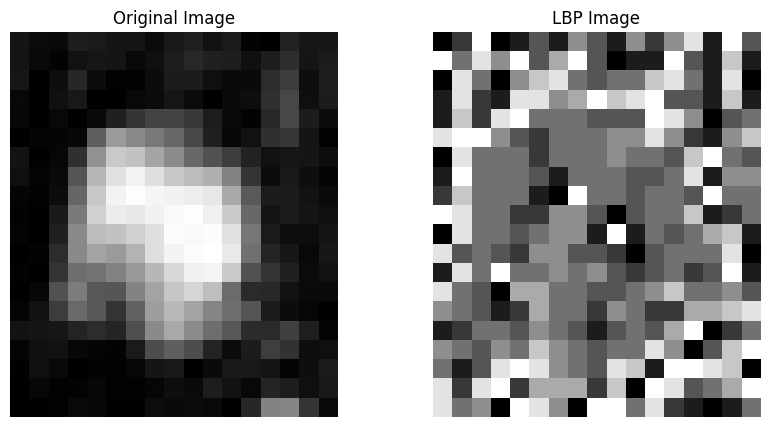

In [ ]:
import cv2
import numpy as np
from skimage import feature
import matplotlib.pyplot as plt

# Load the image (assuming grayscale or converting it to grayscale)
image = cv2.imread('/content/drive/MyDrive/clasification-roi/test/Malignant/BreaDM-Ma-1801/SUB1/p-041.jpg', cv2.IMREAD_GRAYSCALE)

# Define parameters for LBP
radius = 1  # Radius around the pixel
num_points = 8 * radius  # Number of points

# Apply LBP
lbp = feature.local_binary_pattern(image, num_points, radius, method="uniform")

# Display original and LBP images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(lbp, cmap="gray")
plt.title("LBP Image")
plt.axis("off")

plt.show()


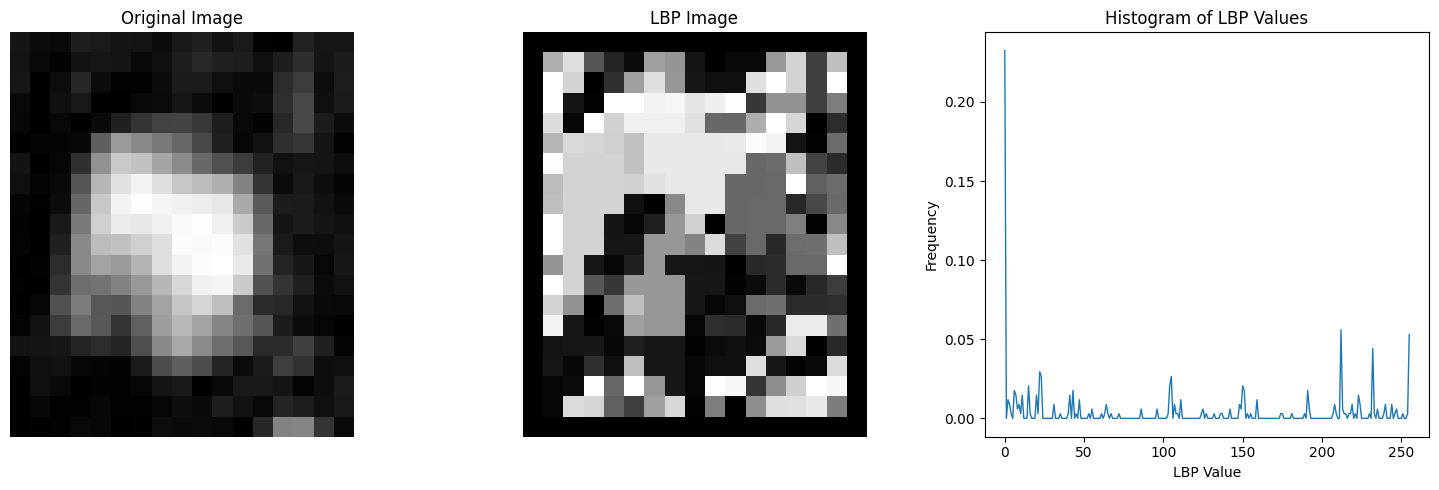

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the uploaded image in grayscale
image = cv2.imread('/content/drive/MyDrive/clasification-roi/test/Malignant/BreaDM-Ma-1801/SUB1/p-041.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize the output LBP image
lbp_image = np.zeros_like(image)

# Define offsets for the 8 neighbors in a 3x3 grid
offsets = [
    (-1, -1), (-1, 0), (-1, 1),
    (0, -1),         (0, 1),
    (1, -1), (1, 0), (1, 1)
]

# Iterate over each pixel in the image (excluding border pixels)
for i in range(1, image.shape[0] - 1):
    for j in range(1, image.shape[1] - 1):
        center = image[i, j]
        binary_pattern = 0

        # Iterate over the 8 neighbors
        for k, (dy, dx) in enumerate(offsets):
            neighbor = image[i + dy, j + dx]

            # Update the binary pattern by setting bits based on neighbor comparison
            if neighbor >= center:
                binary_pattern |= (1 << k)  # Set k-th bit if condition is true

        # Assign the binary pattern as the LBP value for this pixel
        lbp_image[i, j] = binary_pattern

# Calculate the histogram of LBP values
hist, bins = np.histogram(lbp_image.ravel(), bins=np.arange(257), density=True)

# Plot original image, LBP image, and histogram
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# LBP Image
plt.subplot(1, 3, 2)
plt.imshow(lbp_image, cmap="gray")
plt.title("LBP Image")
plt.axis("off")

# Histogram of LBP values
plt.subplot(1, 3, 3)
plt.plot(bins[:-1], hist, lw=1)
plt.title("Histogram of LBP Values")
plt.xlabel("LBP Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

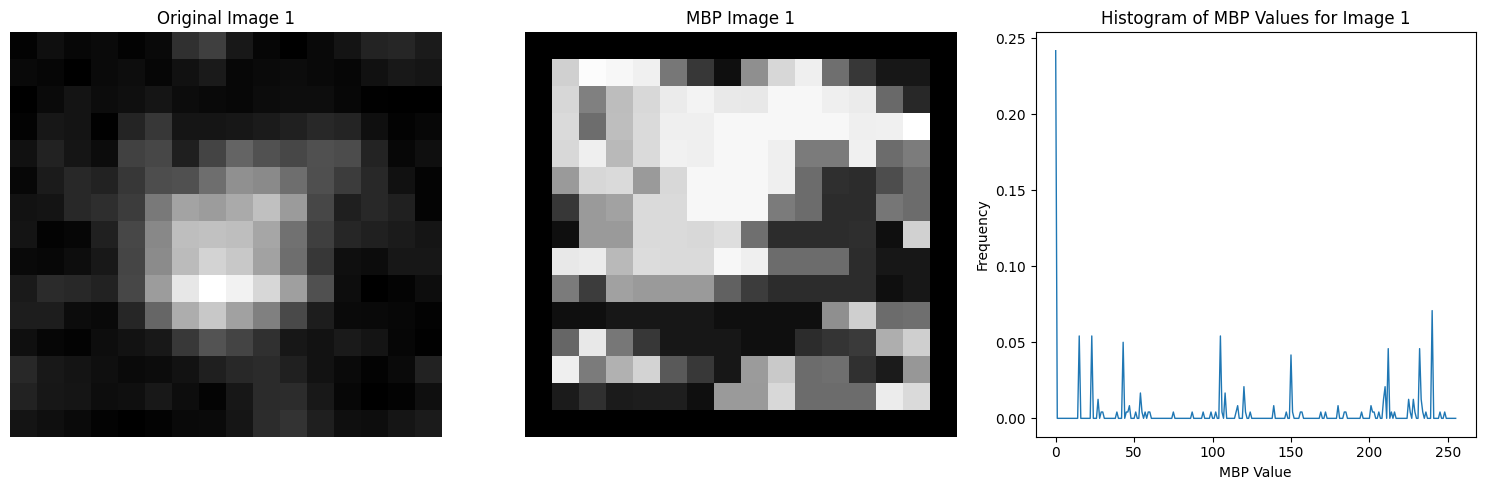

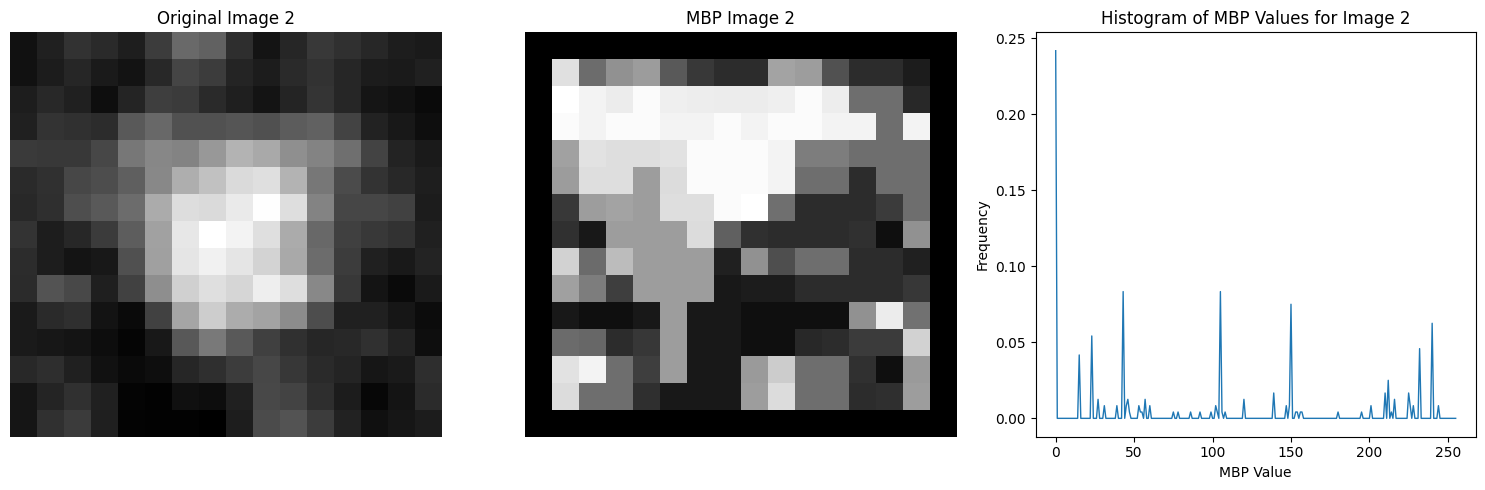

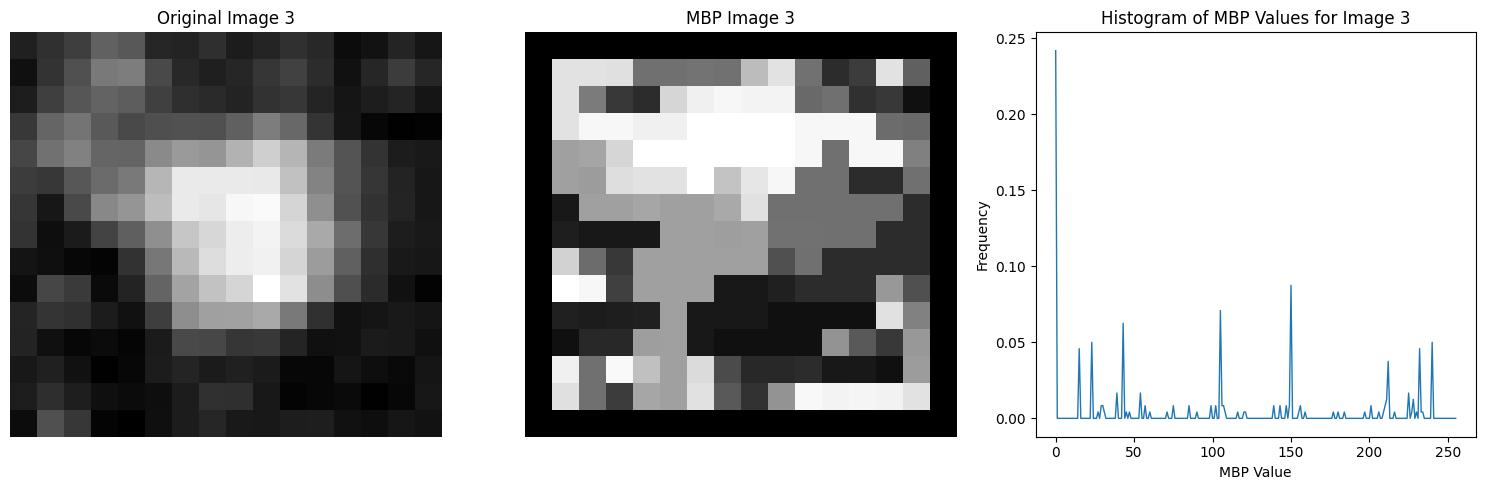

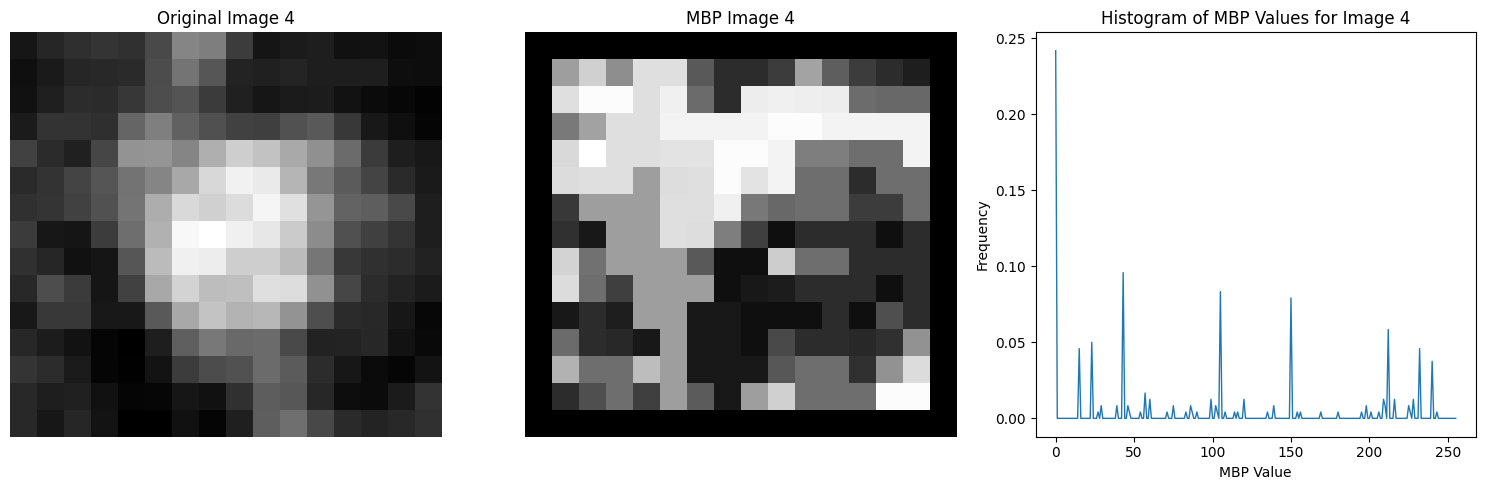

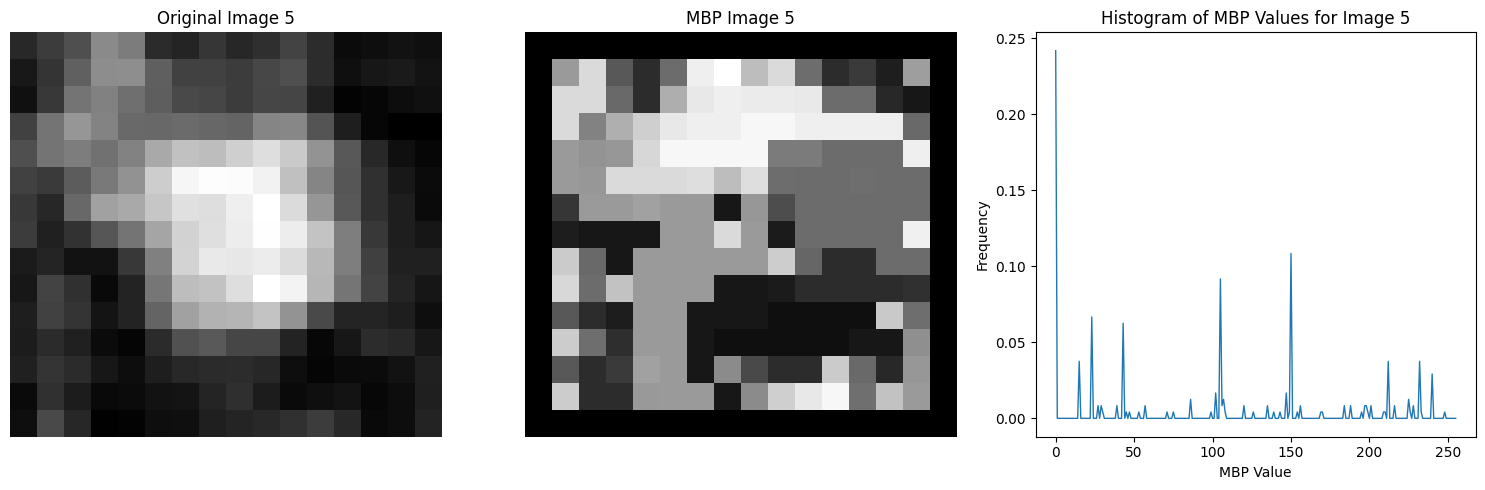

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Manually specify file paths for the 5 images
image_paths = [
    '/content/drive/MyDrive/clasification-roi/test/Benign/BreaDM-Be-1810/SUB1/p-030.jpg',
    '/content/drive/MyDrive/clasification-roi/test/Benign/BreaDM-Be-1810/SUB2/p-030.jpg',
    '/content/drive/MyDrive/clasification-roi/test/Benign/BreaDM-Be-1810/SUB2/p-031.jpg',
    '/content/drive/MyDrive/clasification-roi/test/Benign/BreaDM-Be-1810/SUB3/p-030.jpg',
    '/content/drive/MyDrive/clasification-roi/test/Benign/BreaDM-Be-1810/SUB3/p-031.jpg'
]

# Load each image in grayscale
images = [cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) for img_path in image_paths]

# Define offsets for the 8 neighbors in a 3x3 grid
offsets = [
    (-1, -1), (-1, 0), (-1, 1),
    (0, -1),         (0, 1),
    (1, -1), (1, 0), (1, 1)
]

# Function to compute MBP for a single image
def compute_mbp(image):
    mbp_image = np.zeros_like(image)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            # Collect the 8 neighbors
            neighbors = [image[i + dy, j + dx] for dy, dx in offsets]
            median_val = np.median(neighbors)  # Compute median of neighbors

            # Create binary pattern based on the median
            binary_pattern = 0
            for k, neighbor in enumerate(neighbors):
                if neighbor >= median_val:
                    binary_pattern |= (1 << k)  # Set the k-th bit if condition is true

            # Assign the binary pattern as the MBP value for this pixel
            mbp_image[i, j] = binary_pattern
    return mbp_image

# Compute and display MBP and histogram for each image
for idx, image in enumerate(images):
    mbp_image = compute_mbp(image)

    # Calculate histogram of MBP values
    hist, bins = np.histogram(mbp_image.ravel(), bins=np.arange(257), density=True)

    # Plot original image, MBP image, and histogram
    plt.figure(figsize=(15, 5))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap="gray")
    plt.title(f"Original Image {idx + 1}")
    plt.axis("off")

    # MBP Image
    plt.subplot(1, 3, 2)
    plt.imshow(mbp_image, cmap="gray")
    plt.title(f"MBP Image {idx + 1}")
    plt.axis("off")

    # Histogram of MBP values
    plt.subplot(1, 3, 3)
    plt.plot(bins[:-1], hist, lw=1)
    plt.title(f"Histogram of MBP Values for Image {idx + 1}")
    plt.xlabel("MBP Value")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()


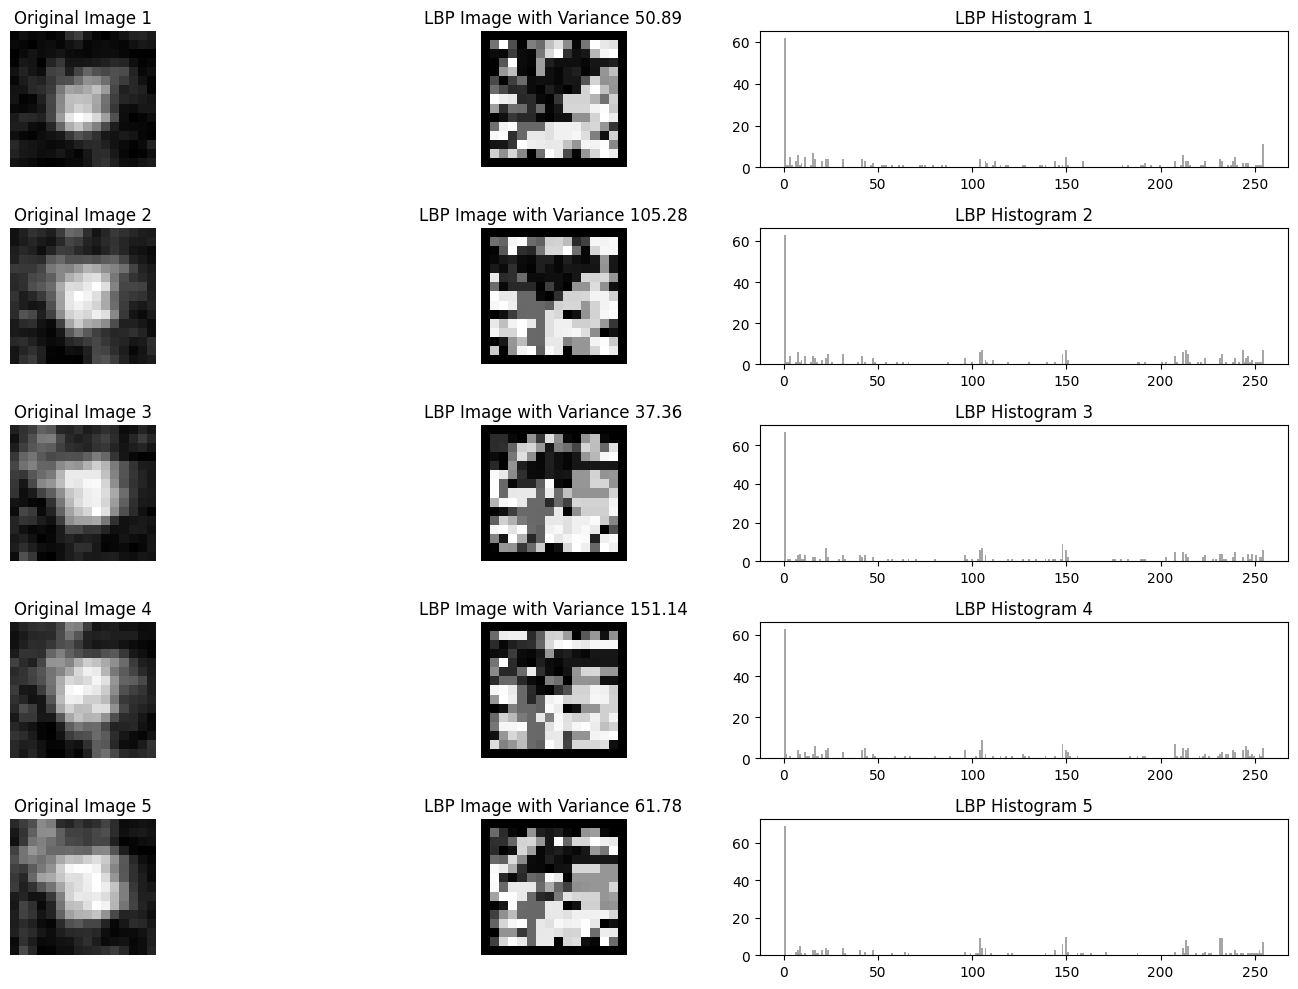

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def custom_lbp_variance(image):
    height, width = image.shape
    lbp_variance_image = np.zeros((height, width), dtype=np.uint8)

    for x in range(1, height - 1):
        for y in range(1, width - 1):
            neighborhood = image[x - 1:x + 2, y - 1:y + 2]
            center_pixel = neighborhood[1, 1]
            variance = np.var(neighborhood)

            binary_pattern = ''.join(['1' if neighborhood[i, j] >= center_pixel else '0'
                                      for i in range(3) for j in range(3) if (i, j) != (1, 1)])
            lbp_variance_image[x, y] = int(binary_pattern, 2)

    return lbp_variance_image, variance


def plot_lbp_with_histograms(images):
    fig, axes = plt.subplots(len(images), 3, figsize=(15, 10))

    for idx, image_path in enumerate(images):
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        lbp_image, variance = custom_lbp_variance(img)

        # Display original image
        axes[idx, 0].imshow(img, cmap='gray')
        axes[idx, 0].set_title(f'Original Image {idx + 1}')
        axes[idx, 0].axis('off')

        # Display LBP image
        axes[idx, 1].imshow(lbp_image, cmap='gray')
        axes[idx, 1].set_title(f'LBP Image with Variance {variance:.2f}')
        axes[idx, 1].axis('off')

        # Display histogram
        axes[idx, 2].hist(lbp_image.ravel(), bins=256, color='gray', alpha=0.7)
        axes[idx, 2].set_title(f'LBP Histogram {idx + 1}')

    plt.tight_layout()
    plt.show()


# Specify file paths for the 5 images
image_paths = [
    '/content/drive/MyDrive/clasification-roi/test/Benign/BreaDM-Be-1810/SUB1/p-030.jpg',
    '/content/drive/MyDrive/clasification-roi/test/Benign/BreaDM-Be-1810/SUB2/p-030.jpg',
    '/content/drive/MyDrive/clasification-roi/test/Benign/BreaDM-Be-1810/SUB2/p-031.jpg',
    '/content/drive/MyDrive/clasification-roi/test/Benign/BreaDM-Be-1810/SUB3/p-030.jpg',
    '/content/drive/MyDrive/clasification-roi/test/Benign/BreaDM-Be-1810/SUB3/p-031.jpg'
]

plot_lbp_with_histograms(image_paths)
